<a href="https://colab.research.google.com/github/PrajwalKalpande/IPL-Score-and-Winner-Prediction/blob/main/IPL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
import matplotlib
%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/WiDS_IPL/IPL_data.zip" -d "/content/data"

Archive:  /content/drive/MyDrive/WiDS_IPL/IPL_data.zip
  inflating: /content/data/IPL Ball-by-Ball 2008-2020.csv  
  inflating: /content/data/IPL Matches 2008-2020.csv  


In [ ]:

df_balls = pd.read_csv("/content/data/IPL Ball-by-Ball 2008-2020.csv")
print(df_balls.shape)
df_matches = pd.read_csv("/content/data/IPL Matches 2008-2020.csv")
print(df_matches.shape)

(193468, 18)
(816, 17)


In [ ]:
df_balls.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [ ]:
df_matches.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
data = pd.merge(left=df_matches, right=df_balls, on='id', how='right')
#merging data (using index of df_balls i.e. match id)
print(data.shape)
data.head()

(193468, 34)


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
data.describe()

,id,neutral_venue,result_margin,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,189871.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,0.094827,17.340895,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.292977,21.886397,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,0.000000,6.000000,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,0.000000,8.000000,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,0.000000,20.000000,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,1.000000,146.000000,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                193468 non-null  int64  
 1   city              190329 non-null  object 
 2   date              193468 non-null  object 
 3   player_of_match   193096 non-null  object 
 4   venue             193468 non-null  object 
 5   neutral_venue     193468 non-null  int64  
 6   team1             193468 non-null  object 
 7   team2             193468 non-null  object 
 8   toss_winner       193468 non-null  object 
 9   toss_decision     193468 non-null  object 
 10  winner            193096 non-null  object 
 11  result            193096 non-null  object 
 12  result_margin     189871 non-null  float64
 13  eliminator        193096 non-null  object 
 14  method            3208 non-null    object 
 15  umpire1           193468 non-null  object 
 16  umpire2           19

# Data Preprocessing

In [ ]:
data.isna().sum()

id                       0
city                  3139
date                     0
player_of_match        372
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                 372
result_margin         3597
eliminator             372
method              190260
umpire1                  0
umpire2                  0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

Fixing null values which are not in venue but are in city.

In [ ]:
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [ ]:
#Filling the values of city based on venue
conditions = [data["venue"] == "Rajiv Gandhi International Stadium, Uppal",data["venue"] == "Maharashtra Cricket Association Stadium",
              data["venue"] == "Saurashtra Cricket Association Stadium", data["venue"] == "Holkar Cricket Stadium",
              data["venue"] == "M Chinnaswamy Stadium",data["venue"] == "Wankhede Stadium",
              data["venue"] == "Eden Gardens",data["venue"] == "Feroz Shah Kotla",
              data["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",data["venue"] == "Green Park",
              data["venue"] == "Punjab Cricket Association Stadium, Mohali",data["venue"] == "Dr DY Patil Sports Academy",
              data["venue"] == "Sawai Mansingh Stadium", data["venue"] == "MA Chidambaram Stadium, Chepauk", 
              data["venue"] == "Newlands", data["venue"] == "St George's Park" , 
              data["venue"] == "Kingsmead", data["venue"] == "SuperSport Park",
              data["venue"] == "Buffalo Park", data["venue"] == "New Wanderers Stadium",
              data["venue"] == "De Beers Diamond Oval", data["venue"] == "OUTsurance Oval", 
              data["venue"] == "Brabourne Stadium",data["venue"] == "Sardar Patel Stadium", 
              data["venue"] == "Barabati Stadium", data["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              data["venue"] == "Himachal Pradesh Cricket Association Stadium",data["venue"] == "Nehru Stadium",
              data["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",data["venue"] == "Subrata Roy Sahara Stadium",
              data["venue"] == "Shaheed Veer Narayan Singh International Stadium",data["venue"] == "JSCA International Stadium Complex",
              data["venue"] == "Sheikh Zayed Stadium",data["venue"] == "Sharjah Cricket Stadium",
              data["venue"] == "Dubai International Cricket Stadium",data["venue"] == "M. A. Chidambaram Stadium",
              data["venue"] == "Feroz Shah Kotla Ground",data["venue"] == "M. Chinnaswamy Stadium",
              data["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,data["venue"] == "IS Bindra Stadium",data["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
data['city'] = np.where(data['city'].isnull(),
                              np.select(conditions, values),
                              data['city'])


In [ ]:
data.isna().sum().city #done!

0

Adding column for years

In [ ]:

data['date'] = pd.to_datetime(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year
data.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


Rearranging overs and making them from 1 to 20

In [ ]:
data["over"].unique()
data = data.sort_values(by=['id','inning','over'])
data['over']=data['over']+1


In [ ]:
data['extras_type'].unique()

array(['legbyes', nan, 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [ ]:
data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
data.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df_balls.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df_matches.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)

In [ ]:
data.isna().sum()

id                       0
city                     0
date                     0
player_of_match        372
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 372
result                 372
result_margin         3597
eliminator             372
method              190260
umpire1                  0
umpire2                  0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
year                     0
dtype: int64

In [ ]:
data = data[data['winner'].notna()]
df_matches = df_matches[df_matches['winner'].notna()]


In [ ]:
data.isna().sum()

id                       0
city                     0
date                     0
player_of_match          0
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                   0
result                   0
result_margin         3225
eliminator               0
method              189888
umpire1                  0
umpire2                  0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183624
player_dismissed    183624
fielder             186332
extras_type         182892
batting_team             0
bowling_team             0
year                     0
dtype: int64

Handling missing result_margin values

In [ ]:

missing_margin = data[data['result_margin'].isna()]
missing_margin.tail(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
192395,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2,20,2,KA Pollard,Ishan Kishan,I Udana,1,0,1,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore,2020
192396,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2,20,3,Ishan Kishan,KA Pollard,I Udana,6,0,6,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore,2020
192397,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2,20,4,Ishan Kishan,KA Pollard,I Udana,6,0,6,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore,2020
192398,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2,20,5,Ishan Kishan,KA Pollard,I Udana,0,0,0,0,1,caught,Ishan Kishan,D Padikkal,NaN,Mumbai Indians,Royal Challengers Bangalore,2020
192399,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2,20,6,KA Pollard,KH Pandya,I Udana,4,0,4,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore,2020


In [ ]:
#since it was a tie in all cases it is resonable to replace it with 0
data['result_margin'].fillna(0,inplace = True)
data.isna().sum()
#Done!

id                       0
city                     0
date                     0
player_of_match          0
venue                    0
neutral_venue            0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                   0
result                   0
result_margin            0
eliminator               0
method              189888
umpire1                  0
umpire2                  0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183624
player_dismissed    183624
fielder             186332
extras_type         182892
batting_team             0
bowling_team             0
year                     0
dtype: int64

# EDA

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
data['extras_type'].nunique(dropna= False)
data['extras_type'].value_counts(dropna = False)

NaN        182892
wides        5848
legbyes      3097
noballs       754
byes          503
penalty         2
Name: extras_type, dtype: int64

## Max Wins Per Season

In [ ]:
#setting the index to match id
data.set_index('id',inplace = True)

In [ ]:
#Finding team with max wins in particular season
s_2008 = data[data['year'] == 2008]
data1 = s_2008['winner'].value_counts().to_frame()
data1.idxmax()

winner    Rajasthan Royals
dtype: object

In [ ]:
df_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
# adding one more column for season
df_matches['date'] = pd.to_datetime(df_matches['date'])
df_matches['season'] = pd.DatetimeIndex(df_matches['date']).year


In [ ]:
df_season = df_matches.groupby('season')['winner'].value_counts()
df_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2020    Kolkata Knight Riders           7
        Royal Challengers Bangalore     7
        Chennai Super Kings             6
        Kings XI Punjab                 6
        Rajasthan Royals                6
Name: winner, Length: 108, dtype: int64

In [ ]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in df_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)
((2020, 'Mumbai Indians'), 11)


In [ ]:
win_per_season_df.set_index('year')

,team,wins
year,,
2008,Rajasthan Royals,13
2009,Delhi Daredevils,10
2010,Mumbai Indians,11
2011,Chennai Super Kings,11
2012,Kolkata Knight Riders,12
2013,Mumbai Indians,13
2014,Kings XI Punjab,12
2015,Chennai Super Kings,10
2016,Sunrisers Hyderabad,11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



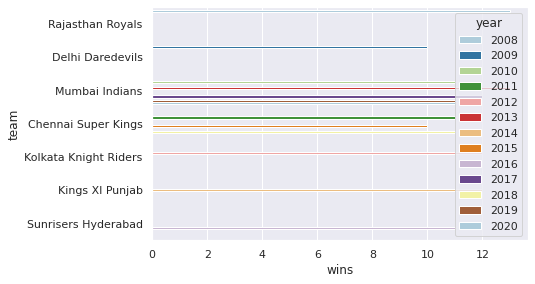

In [ ]:
sns.set_theme(style="darkgrid")
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired',saturation =  0.75);
plt.show()

### **Inferences**


*   Mumbai Indians is the most consistent team ending 5 seasons with maximum no. of wins in that season followed by CSK 

*   Rest of the teams have maximum no. of wins in atmost 1 season showing the supremacy of Mumbai Indians and CSK in IPL
 



## Stadiums used in IPL

In [ ]:
venue = df_matches['venue'].value_counts()
venue.head()

Eden Gardens                                 77
Feroz Shah Kotla                             73
Wankhede Stadium                             73
Rajiv Gandhi International Stadium, Uppal    64
M Chinnaswamy Stadium                        63
Name: venue, dtype: int64

In [ ]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)


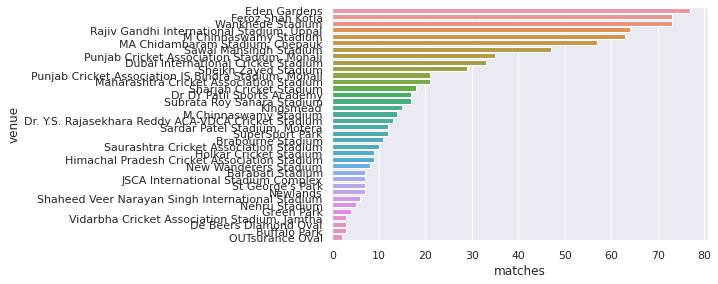

In [ ]:
sns.barplot(x='matches', y='venue', data=venue_df)
plt.show()

## Top hosting Cities

In [ ]:
cities = df_matches['city'].value_counts().to_frame()
cities.head()

,city
Mumbai,101
Kolkata,77
Delhi,73
Hyderabad,64
Bangalore,63


In [ ]:
cities = cities.head(10)

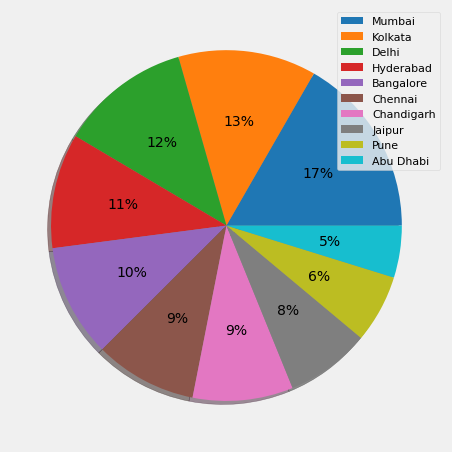

In [ ]:
cs = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
f=plt.figure(figsize=(7,16))
ax=f.add_subplot(111, aspect='equal')

plt.pie(cities['city'] ,autopct = '%0.0f%%',shadow=True,colors=cs)
plt.legend(cities.index,prop={'size': 11})
plt.show()

## Plotting win percentage of each team

In [ ]:
df_won = df_matches['winner'].value_counts().to_frame()
df_won.head()

,winner
Mumbai Indians,120
Chennai Super Kings,106
Kolkata Knight Riders,99
Royal Challengers Bangalore,91
Kings XI Punjab,88


In [ ]:
len(df_matches['id'])

812

In [ ]:
df_total_matches = df_matches['team1'].value_counts() + df_matches['team2'].value_counts()
df_total_matches.sort_values(ascending = False,inplace= True)
df_total_matches.head()

Mumbai Indians                 203
Royal Challengers Bangalore    192
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
dtype: int64

In [ ]:
df_won.reindex(df_total_matches.index).head()
total =  df_total_matches.values

In [ ]:
df_won.index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Delhi Capitals', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype='object')

In [ ]:
df_percent= pd.DataFrame(columns=['Team','Win Percentage'])
i= 0 

for i in range(len(df_won)):
     
    temp_df = pd.DataFrame({
        'Team':df_won.index[i],
        'Win Percentage':df_won.values[i]/total[i]
        
    })
     
     
    df_percent= df_percent.append(temp_df)


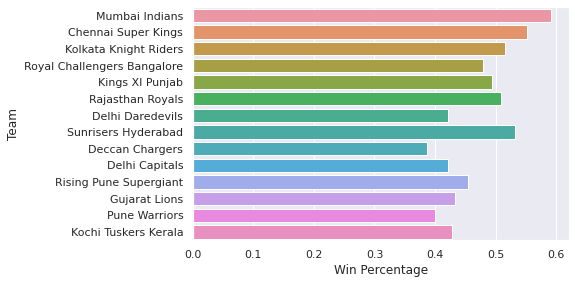

In [ ]:
sns.barplot( y = 'Team',x= 'Win Percentage',data = df_percent,orient= "h")
plt.show()



*   Mumbai Indians is the most successful team in terms of win percentage follwed by CSK and SRH with win percentage close to 60%.
*   Deccan Chargers has the least win percentage



## Most Man of the Matches

In [ ]:
df_man = df_matches['player_of_match'].value_counts().to_frame()
df_man.head()

,player_of_match
AB de Villiers,23
CH Gayle,22
RG Sharma,18
MS Dhoni,17
DA Warner,17


In [ ]:
df_man = df_man.head(15)
df_man.values.reshape(15,)

array([23, 22, 18, 17, 17, 16, 16, 14, 13, 13, 12, 12, 11, 11, 11])

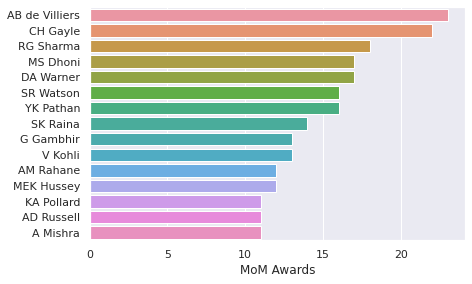

In [ ]:
sns.barplot(y=df_man.index,x = df_man.values.reshape(15,), orient = "h")
plt.xlabel('MoM Awards')
plt.show()

## Toss Win Percentage and Toss Influence

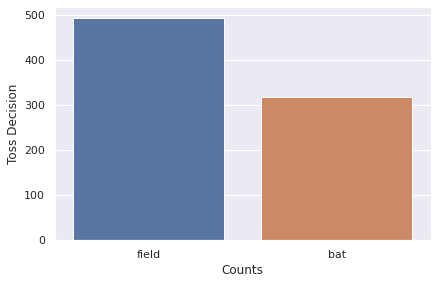

In [ ]:
df_toss = df_matches['toss_decision'].value_counts().to_frame().reset_index()
sns.barplot(x= 'index', y = 'toss_decision',data = df_toss)
plt.xlabel("Counts")
plt.ylabel('Toss Decision')
plt.show()

In [ ]:
df_toss_win = df_matches['toss_winner'].value_counts().to_frame()
df_toss_win.reindex(df_matches.index)
df_toss_win.head()


,toss_winner
Mumbai Indians,106
Kolkata Knight Riders,98
Chennai Super Kings,97
Royal Challengers Bangalore,86
Kings XI Punjab,85


In [ ]:
toss_data = pd.DataFrame()
toss_data['toss_influence'] = df_matches.apply(lambda x : 'Yes' if x['toss_winner']==x['winner'] else 'No', axis=1)
toss_data = toss_data.value_counts().reset_index()
toss_data.head()

,toss_influence,0
0,Yes,418
1,No,394


In [ ]:
toss_data= toss_data.rename(columns= {'toss_influence':'toss_winner', 0:'count'})


In [ ]:
df_toss_percent= pd.DataFrame(columns=['Team','Toss Win Percentage'])
i= 0 

for i in range(len(df_toss_win)):
     
    temp_df = pd.DataFrame({
        'Team':df_toss_win.index[i],
        'Toss Win Percentage':df_toss_win.values[i]/total[i]
        
    })
     
     
    df_toss_percent= df_toss_percent.append(temp_df)


In [ ]:
df_toss_percent.head()
 

,Team,Toss Win Percentage
0,Mumbai Indians,0.522167
0,Kolkata Knight Riders,0.510417
0,Chennai Super Kings,0.505208
0,Royal Challengers Bangalore,0.452632
0,Rajasthan Royals,0.477528


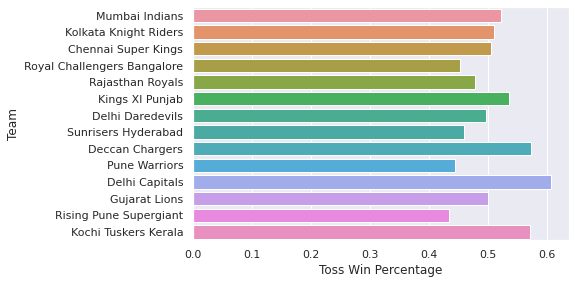

In [ ]:
sns.barplot(y = 'Team', x = "Toss Win Percentage",data= df_toss_percent,orient = 'h')
plt.show()

The toss win percentage of some teams like Kochi Tuskers Kerala, Pune Warriors and Deccan Chargers are little high as compared to others since they have played fewer seasons as compared to other teams.

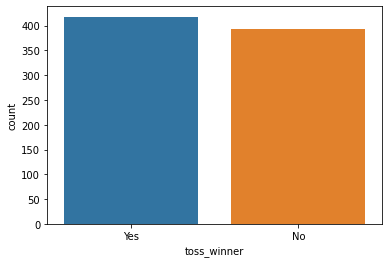

In [ ]:
sns.barplot(x = 'toss_winner', y= "count",data= toss_data,orient = 'v')
plt.show()

##Top 10 Greatest Victories

### By Runs

In [ ]:
df_run_margins = df_matches[df_matches['result']=='runs'].sort_values(by= 'result_margin',ascending = False).head(10)

In [ ]:
xlabel2=  np.where(df_run_margins['team1'] == df_run_margins['winner'], df_run_margins['team2'], df_run_margins['team1']) 
xlabel1 = np.array(df_run_margins['winner'].values)
xlabels_runs = xlabel1 +' vs ' + xlabel2 
xlabels_runs[0]+= ' (2017)'
xlabels_runs[9]+= ' (2010)'

In [ ]:
df_run_plot = df_run_margins
df_run_plot['xlabel'] = xlabels_runs


In [ ]:
 
fig = px.bar(df_run_plot, x='xlabel', y='result_margin',
             hover_data=['winner','season'], color='result_margin',
             height=500  )
fig.update_layout(barmode='group',xaxis_tickangle=20,yaxis_title = 'Win Margin in Runs',xaxis_title = 'Teams')

fig.show()

### By Wickets

In [ ]:
df_wicket_margins = df_matches[df_matches['result']=='wickets'].sort_values(by= ['result_margin','season'],ascending = False).head(10)

In [ ]:
xlabel2=  np.where(df_wicket_margins['team1'] == df_wicket_margins['winner'], df_wicket_margins['team2'], df_wicket_margins['team1']) 
xlabel1 = np.array(df_wicket_margins['winner'].values)
xlabels_wickets = xlabel1 +' vs ' + xlabel2 
xlabels_wickets[1]+= '(2020)'
xlabels_wickets[8]+='(2013)'

In [ ]:
df_wicket_plot = df_wicket_margins
df_wicket_plot['xlabel']= xlabels_wickets

In [ ]:
 
fig = px.bar(df_wicket_plot, x='xlabel', y='result_margin',
             hover_data=['winner','season'], color='season',
             height=600  )
fig.update_layout(barmode='group',xaxis_tickangle=20,yaxis_title = 'Win Margin in Wickets',xaxis_title = 'Teams')

fig.show()

## Rivalry between Teams

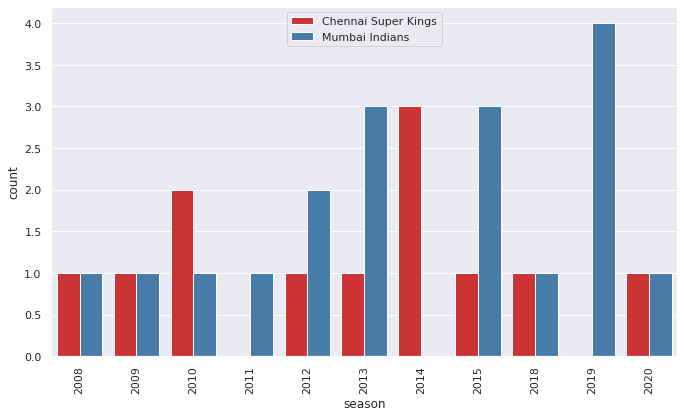

In [ ]:
def team1_vs_team2(team1,team2):
    mt1=df_matches[((df_matches['team1']==team1)|(df_matches['team2']==team1))&((df_matches['team1']==team2)|(df_matches['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette= "Set1" )
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()
team1_vs_team2('Mumbai Indians','Chennai Super Kings')

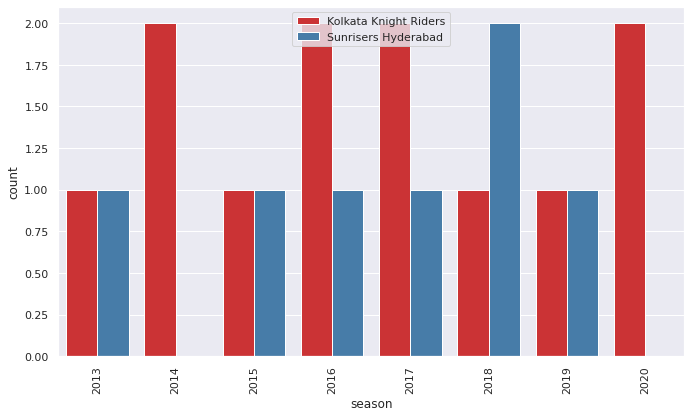

In [ ]:
team1_vs_team2('Sunrisers Hyderabad','Kolkata Knight Riders')

## Strike Rates in different overs

In [ ]:
import altair as alt

In [ ]:
top_batsmen= df_balls['batsman'].value_counts().index[:25]

In [ ]:
df_batsman_runs = df_balls.pivot_table(index = ['batsman','over'] ,aggfunc= ['count',
'sum'], values= 'batsman_runs')

In [ ]:
df_batsman_runs = df_batsman_runs.fillna(0).reset_index()

In [ ]:
df_batsman_runs.columns= ['batsman','over','balls','runs']
df_batsman_runs['strike_rate']  = df_batsman_runs.runs/df_batsman_runs.balls*100.0

In [ ]:
df_batsman_runs.head()

,batsman,over,balls,runs,strike_rate
0,A Ashish Reddy,4,2,0,0.000000
1,A Ashish Reddy,5,5,5,100.000000
2,A Ashish Reddy,11,1,1,100.000000
3,A Ashish Reddy,12,9,9,100.000000
4,A Ashish Reddy,13,15,22,146.666667


In [ ]:
alt.data_transformers.disable_max_rows()
 
alt.Chart(df_batsman_runs[df_batsman_runs['batsman'].isin(top_batsmen)]).mark_point(shape="circle").encode(
alt.X('over'),
alt.Y('mean(strike_rate)'),
color='batsman',
text="batsman",
size='balls',
opacity='runs',
tooltip=list(df_batsman_runs.columns)
).properties(width=600,height=500)

alt.Chart(...)

## Comparing Batsman Stats

In [ ]:
runs =  df_balls.pivot_table(index = 'batsman' ,columns= 'batsman_runs',aggfunc= ['count'], values= 'ball')

In [ ]:
runs.fillna(0,inplace= True)
runs.reset_index()

batsman  count                                      
batsman_runs                      0      1      2    3      4    5      6
0             A Ashish Reddy   61.0   83.0   20.0  1.0   16.0  0.0   15.0
1                 A Chandila    3.0    4.0    0.0  0.0    0.0  0.0    0.0
2                   A Chopra   45.0   21.0    2.0  0.0    7.0  0.0    0.0
3                A Choudhary    4.0   13.0    1.0  0.0    1.0  0.0    1.0
4                A Dananjaya    2.0    2.0    1.0  0.0    0.0  0.0    0.0
..                       ...    ...    ...    ...  ...    ...  ...    ...
532              YV Takawale  100.0   41.0   12.0  0.0   26.0  1.0    3.0
533            Yashpal Singh   39.0   20.0    2.0  1.0    5.0  0.0    0.0
534              Younis Khan    4.0    3.0    0.0  0.0    0.0  0.0    0.0
535             Yuvraj Singh  976.0  741.0  119.0  3.0  217.0  0.0  149.0
536                   Z Khan   74.0   47.0    7.0  0.0   11.0  0.0    2.0

[537 rows x 8 columns]

In [ ]:
runs.head()

count                                  
batsman_runs       0     1     2    3     4    5     6
batsman                                               
A Ashish Reddy  61.0  83.0  20.0  1.0  16.0  0.0  15.0
A Chandila       3.0   4.0   0.0  0.0   0.0  0.0   0.0
A Chopra        45.0  21.0   2.0  0.0   7.0  0.0   0.0
A Choudhary      4.0  13.0   1.0  0.0   1.0  0.0   1.0
A Dananjaya      2.0   2.0   1.0  0.0   0.0  0.0   0.0

In [ ]:
runs = runs['count']
runs

batsman_runs,0,1,2,3,4,5,6
batsman,,,,,,,
A Ashish Reddy,61.0,83.0,20.0,1.0,16.0,0.0,15.0
A Chandila,3.0,4.0,0.0,0.0,0.0,0.0,0.0
A Chopra,45.0,21.0,2.0,0.0,7.0,0.0,0.0
A Choudhary,4.0,13.0,1.0,0.0,1.0,0.0,1.0
A Dananjaya,2.0,2.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
YV Takawale,100.0,41.0,12.0,0.0,26.0,1.0,3.0
Yashpal Singh,39.0,20.0,2.0,1.0,5.0,0.0,0.0
Younis Khan,4.0,3.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
runs['Sixes']= runs[6]
runs['Fours']= runs[4]
runs = runs[runs.index.isin(top_batsmen)]

In [ ]:
runs.head()

batsman_runs,0,1,2,3,4,5,6,Sixes,Fours
batsman,,,,,,,,,
AB de Villiers,1041.0,1333.0,249.0,16.0,390.0,0.0,235.0,235.0,390.0
AM Rahane,1271.0,1326.0,221.0,15.0,416.0,0.0,76.0,76.0,416.0
AT Rayudu,1069.0,1288.0,172.0,1.0,308.0,0.0,132.0,132.0,308.0
BB McCullum,1025.0,713.0,103.0,3.0,293.0,0.0,130.0,130.0,293.0
CH Gayle,1560.0,959.0,87.0,3.0,384.0,0.0,349.0,349.0,384.0


In [ ]:
df_  = df_batsman_runs
df_.set_index('batsman')
df_ = df_.pivot_table(index= 'batsman',aggfunc='mean',values= 'strike_rate')
df_= df_[df_.index.isin(top_batsmen)]
df_.head(5)

,strike_rate
batsman,
AB de Villiers,148.606213
AM Rahane,126.922426
AT Rayudu,123.519155
BB McCullum,142.437787
CH Gayle,158.360420


In [ ]:
total_runs =  df_batsman_runs.pivot_table(index = 'batsman' ,aggfunc= ['sum'], values= 'runs') 
total_runs = total_runs[total_runs.index.isin(top_batsmen)]


In [ ]:
total_runs.reset_index()
total_runs = total_runs['sum']


In [ ]:
total_runs.sort_values(by= 'runs',ascending= False,inplace = True)
runs= runs[ ['Sixes','Fours']]
 

In [ ]:
batsman_stats = runs.merge(total_runs,on = 'batsman' )
batsman_stats = batsman_stats.merge(df_,on = 'batsman')
batsman_stats['Points'] = batsman_stats['strike_rate']*1 + batsman_stats['Sixes']*0.5 + batsman_stats['Fours']*0.5 + batsman_stats['runs']*0.75

In [ ]:
df_stats= pd.DataFrame()
df_stats['runs'] = (batsman_stats['runs'])/(batsman_stats['runs'].max()/100)
df_stats['Sixes'] = (batsman_stats['Sixes'])/(batsman_stats['Sixes'].max()/100)
df_stats['Fours'] = (batsman_stats['Fours'])/(batsman_stats['Fours'].max()/100)
df_stats['Points'] = (batsman_stats['Points'])/(batsman_stats['Points'].max()/100)
df_stats['strike_rate'] = (batsman_stats['strike_rate'])/(batsman_stats['strike_rate'].max()/100)

In [ ]:
df_stats.sort_values(by = 'Points',ascending = False,inplace = True)
df_stats.head()

,runs,Sixes,Fours,Points,strike_rate
batsman,,,,,
V Kohli,100.000000,57.879656,85.279188,100.000000,86.326950
SK Raina,91.323579,55.587393,83.417936,91.977861,85.732722
DA Warner,89.384144,55.873926,86.294416,90.726366,95.330556
RG Sharma,88.975842,61.318052,77.495770,89.665388,84.299450
S Dhawan,88.414427,31.232092,100.000000,89.416772,83.397891


In [ ]:
def compare(a,b,c):
  x = df_stats[df_stats.index == a]
  y = df_stats[df_stats.index == b]
  z = df_stats[df_stats.index == c]

  data = [go.Scatterpolar(
  r = [x['Fours'].values[0],x['Sixes'].values[0],x['runs'].values[0],x['strike_rate'].values[0],x['Points'].values[0]],
  theta = ['Fours','Sixes','Runs','Strike Rate','Points'],
  fill = 'toself', opacity = 0.8,subplot = "polar1",
  name = a),
  go.Scatterpolar(
  r = [y['Fours'].values[0],y['Sixes'].values[0],y['runs'].values[0],y['strike_rate'].values[0],y['Points'].values[0]],
  theta = ['Fours','Sixes','Runs','Strike Rate','Points'],
  fill = 'toself', opacity = 0.8,subplot = "polar2",
  name = b),
  go.Scatterpolar(
  r = [z['Fours'].values[0],z['Sixes'].values[0],z['runs'].values[0],z['strike_rate'].values[0],z['Points'].values[0]],
  theta = ['Fours','Sixes','Runs','Strike Rate','Points'],
  fill = 'toself', opacity = 0.8,subplot= 'polar3',
  name = c)]
  layout = go.Layout(title = f"Comparison Between {a}, {b}, {c}",
                   
                   polar1 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0, 0.25],y = [0, 1])),
                  
                   polar2 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.35, 0.65],y = [0, 1])),
                  
                   polar3 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.75, 1.0],y = [0, 1])),)
  
  fig = go.Figure(data=data, layout=layout)
  pyo.iplot(fig)

In [ ]:
compare('V Kohli','S Dhawan','DA Warner')

In [ ]:
data.to_csv("/content/drive/MyDrive/WiDS_IPL/ipl_data.csv", index=True)